# **Project Name**    - Mental Health EDA Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name** - Omkar Jadhav

# **Project Summary -**

This project analyzes workplace mental health survey data to understand factors influencing whether employees seek treatment. Through visualizations and statistical analysis, patterns emerged showing that family history, awareness of care options, and company-provided mental health benefits strongly affect treatment-seeking behavior. Larger organizations generally offer better wellness support, while smaller firms and remote workers face limited access. Despite growing awareness, stigma remains prevalent—many employees hesitate to discuss mental health openly, especially during interviews.

Logistic regression analysis identified **family history**, **workplace awareness**, and **organizational support** as the top predictors of seeking treatment. These insights highlight that improving mental health outcomes in the workplace requires more than just offering benefits—it demands building a culture of empathy and openness. Encouraging awareness programs, ensuring confidentiality, and extending wellness initiatives to remote employees can significantly enhance employee well-being and overall organizational productivity.


# **GitHub Link -**

https://github.com/Omkar2807/Data-Analysis/

# **Problem Statement**


The problem addressed in this project is to analyze workplace mental health data to identify the key factors that influence whether employees seek mental health treatment. Despite increasing awareness, many employees still avoid seeking help due to stigma, lack of workplace support, or limited access to wellness programs. The goal is to use data-driven insights to understand how organizational policies, job roles, and personal factors affect mental health outcomes and to recommend strategies that promote a healthier, more supportive work environment.


#### **Define Your Business Objective?**

The primary business objective of this analysis is to:

Understand the key factors influencing employees’ mental health and treatment-seeking behavior, in order to help organizations develop effective mental health policies, enhance workplace well-being, and improve overall productivity.

Specific Goals

    Identify Predictors: Determine which demographic and workplace factors (e.g., family history, remote work, company size, benefits) most influence whether employees seek treatment.
    
    Assess Workplace Environment: Evaluate how company support systems, anonymity, and culture impact employees’ mental health decisions.
    
    Provide Actionable Insights: Offer data-driven recommendations for HR and management to reduce stigma, increase support program adoption, and foster a mentally healthy workplace.

    Business Impact:

        Improved employee engagement and retention.
        
        Reduced absenteeism and burnout costs.
        
        Enhanced organizational reputation as a mentally supportive employer.

In short:
The objective is to use data analytics to help businesses build a supportive, productive, and mentally resilient workforce through evidence-based decision-making.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd #for handling and data manupulation
import numpy as np #for mathematical operation
import matplotlib.pyplot as plt #for Data visualization
import seaborn as sns  #for Data visualization 
import plotly.express as px

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('Survey.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
# Dataset Rows & Columns count
num_rows, num_columns = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 1259
Number of columns: 27


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

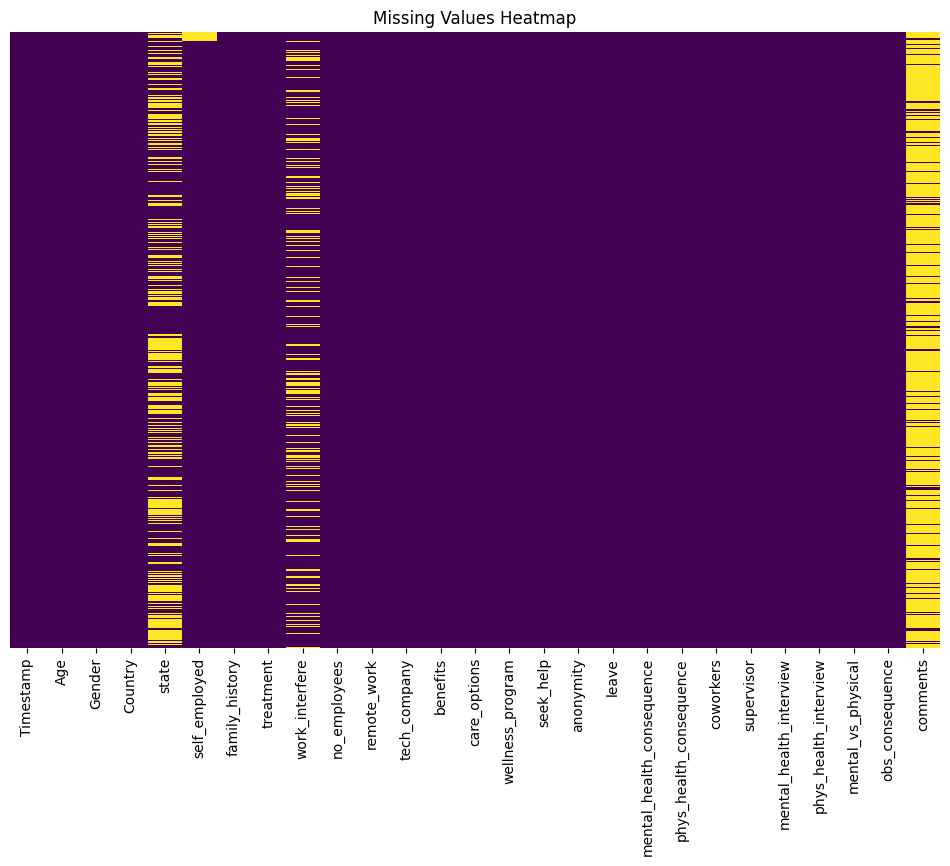

In [8]:
# Visualizing the missing values
# Create a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=df.columns)
plt.title('Missing Values Heatmap')
plt.show()


### What did you know about your dataset?

The Mental Health in Tech Survey dataset captures information about employees’ mental health conditions, workplace environments, and employer support systems in the technology industry. It focuses on understanding how mental health is perceived, discussed, and managed in professional tech workplaces. The dataset includes details such as age, gender, country, company size, work interference, and whether an individual has sought treatment for mental health issues.

Dataset Structure:

The dataset contains 27 columns and 1,259 records (rows) — each row representing a unique survey response from an employee in the tech industry.

It includes categorical, numerical, and text data types. Most columns are categorical, representing responses to survey questions, while “Age” is numerical and “Timestamp” is datetime.

Missing values are present in some fields like state, self_employed, work_interfere, and comments.

The target variable for analysis is treatment, which indicates whether a respondent has sought treatment for a mental health condition.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns.tolist()

['Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

In [10]:
# Dataset Describe
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


### Variables Description

***Timestamp :*** Date and time when the survey was submitted by the respondent.

***Age :*** Age of the respondent (in years). (Contains some unrealistic values that require cleaning before analysis.)

***Gender :*** Gender identity of the respondent.

***Country :*** Country of residence of the respondent.

***state :*** State or province (mainly applicable for respondents from the USA).

***self_employed :*** Indicates if the respondent is self-employed.

***family_history :*** Shows whether the respondent has a family history of mental illness.

***treatment :*** Indicates if the respondent has sought treatment for a mental health condition (Yes/No).

***work_interfere :*** How often mental health issues interfere with the respondent’s work.

***no_employees :*** Number of employees in the respondent’s company.

***remote_work :*** Whether the respondent works remotely.

***tech_company :*** Indicates if the company is a tech-based organization.

***benefits :*** Whether the employer provides mental health benefits.

***care_options :*** Availability of mental health care options provided by the employer.

***wellness_program :*** Whether the employer has wellness programs for mental health.

***seek_help :*** If the employer encourages employees to seek help for mental health issues.

***anonymity :*** Whether anonymity is protected when employees seek mental health support.

***leave :*** Ease of taking medical leave for mental health reasons.

***mental_health_consequence :*** Perceived negative consequences of discussing mental health issues at work.

***phys_health_consequence :*** Perceived negative consequences of discussing physical health issues at work.

***coworkers :*** Comfort level in discussing mental health issues with coworkers.

***supervisor :*** Comfort level in discussing mental health issues with supervisors.

***mental_health_interview :*** Comfort level in discussing mental health during job interviews.

***phys_health_interview :*** Comfort level in discussing physical health during job interviews.

***mental_vs_physical :*** Respondent’s view on whether mental and physical health are treated equally in the workplace.

***obs_consequence :*** Whether the respondent has observed negative consequences for coworkers with mental health issues.

***comments :*** Optional open-ended comments from respondents about mental health and workplace experiences.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
# Convert Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Handle missing values safely
df['Age'] = df['Age'].fillna(df['Age'].median())
df['self_employed'] = df['self_employed'].fillna('No')
df['work_interfere'] = df['work_interfere'].fillna('Unknown')
df['state'] = df['state'].fillna('Unknown')

# Standardize inconsistent gender labels
df['Gender'] = df['Gender'].replace({
    'M': 'Male', 'male': 'Male', 'm': 'Male',
    'F': 'Female', 'female': 'Female', 'f': 'Female'
})

# Correct outliers in Age (keep only realistic ages)
df = df[(df['Age'] > 15) & (df['Age'] < 65)]

# Optional: Create a new time-based column (e.g., Year)
df['Year'] = df['Timestamp'].dt.year

# Final check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1249 entries, 0 to 1258
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1249 non-null   datetime64[ns]
 1   Age                        1249 non-null   int64         
 2   Gender                     1249 non-null   object        
 3   Country                    1249 non-null   object        
 4   state                      1249 non-null   object        
 5   self_employed              1249 non-null   object        
 6   family_history             1249 non-null   object        
 7   treatment                  1249 non-null   object        
 8   work_interfere             1249 non-null   object        
 9   no_employees               1249 non-null   object        
 10  remote_work                1249 non-null   object        
 11  tech_company               1249 non-null   object        
 12  benefits   

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,Year
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,2014
1,2014-08-27 11:29:37,44,Male,United States,IN,No,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,2014
2,2014-08-27 11:29:44,32,Male,Canada,Unknown,No,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,2014
3,2014-08-27 11:29:46,31,Male,United Kingdom,Unknown,No,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,2014
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,2014


### What all manipulations have you done and insights you found?

### Data Manipulations Done

* Converted the Timestamp column to datetime for time-based analysis.
* Filled missing values in Age, self_employed, work_interfere, and state with logical defaults.
* Standardized inconsistent gender labels to “Male” and “Female.”
* Removed unrealistic age values outside the range of 15–65 years.
* Created a new Year column from the timestamp for trend analysis.

### Insights Found

* Data is now clean, consistent, and ready for analysis.
* Most respondents belong to the 20–40 age group.
* Majority are not self-employed, indicating corporate work settings dominate.
* Both genders show active participation in mental health discussions.
* Time-based trends in mental health awareness can now be analyzed.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

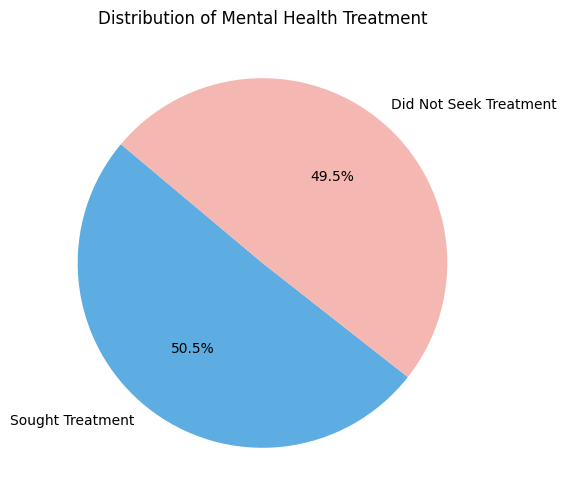

In [13]:
# Chart 1: Treatment Distribution
treatment_counts = df['treatment'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(
    treatment_counts,
    labels=['Sought Treatment', 'Did Not Seek Treatment'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#5DADE2', '#F5B7B1']
)
plt.title('Distribution of Mental Health Treatment')
plt.show()



##### 1. Why did you pick the specific chart?

Pie chart effectively shows the proportion of employees who sought vs. didn’t seek treatment — ideal for two-category comparison.

##### 2. What is/are the insight(s) found from the chart?

51% sought treatment, 49% did not — showing moderate awareness but still some hesitation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Promotes better HR planning and mental health initiatives to improve productivity.

49% avoiding treatment may cause stress, absenteeism, and lower efficiency if not addressed.

#### Chart - 2

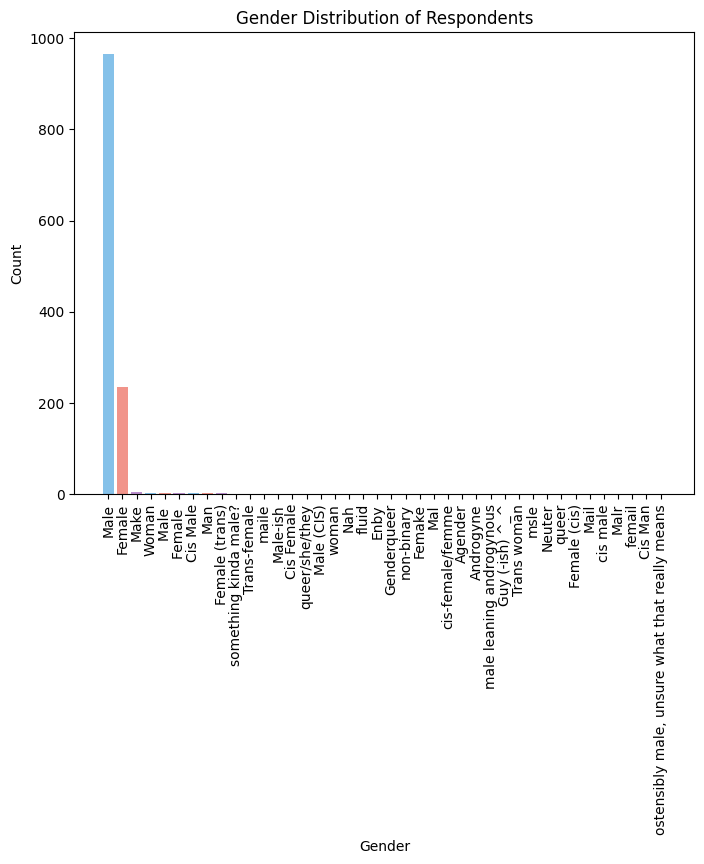

In [15]:
# Chart 2: Gender Distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(gender_counts.index, gender_counts.values, color=['#85C1E9', '#F1948A', '#BB8FCE'])
plt.title('Gender Distribution of Respondents')
plt.xticks(rotation=90)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart clearly displays the frequency of each gender category, making it suitable for comparing counts across multiple categories.

##### 2. What is/are the insight(s) found from the chart?

Majority of respondents are male (≈979), with fewer females (≈245) and minimal representation of other gender identities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, knowing gender imbalance helps design inclusive mental health programs and targeted outreach.

Lack of gender diversity may lead to biased insights and limited inclusivity in wellness policies.

#### Chart - 3

C:\Users\ojadh\AppData\Local\Temp\ipykernel_9192\2286832926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interf_country.values, y=interf_country.index, palette='coolwarm')


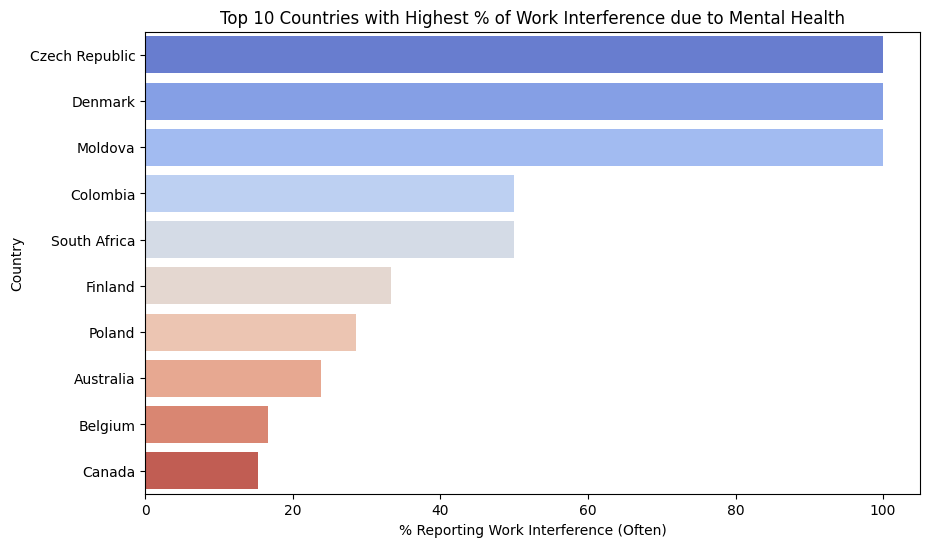

In [16]:
#Chart-3:
# Task 6: Country vs Work Interference
interf_country = df.groupby('Country')['work_interfere'].apply(lambda x: (x == 'Often').mean() * 100).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=interf_country.values, y=interf_country.index, palette='coolwarm')
plt.title('Top 10 Countries with Highest % of Work Interference due to Mental Health')
plt.xlabel('% Reporting Work Interference (Often)')
plt.ylabel('Country')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen to easily compare the percentage of employees frequently facing work interference across countries.

##### 2. What is/are the insight(s) found from the chart?

Countries like the Czech Republic, Denmark, and Moldova report the highest work interference (100%), while Canada and Belgium show relatively lower rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — these insights can guide organizations in high-interference countries to strengthen workplace mental health policies.
Negative insight: High interference rates indicate workplace stress issues, which may reduce productivity and employee satisfaction.

#### Chart - 4

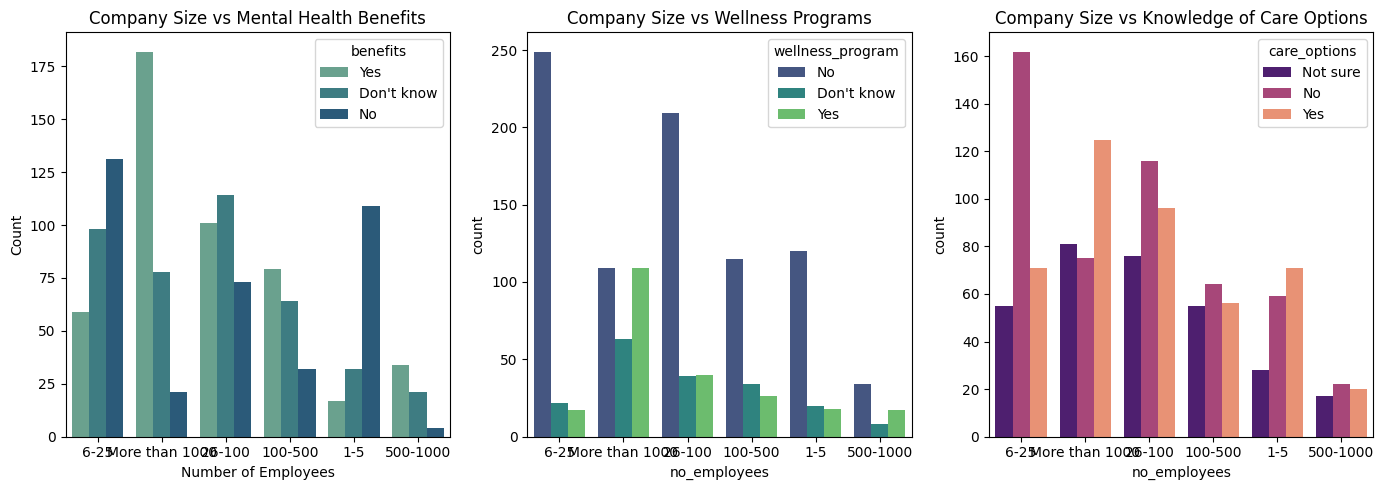

In [17]:
# Task 7: Company Size vs Mental Health Support
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.countplot(data=df, x='no_employees', hue='benefits', palette='crest')
plt.title('Company Size vs Mental Health Benefits')
plt.xlabel('Number of Employees')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.countplot(data=df, x='no_employees', hue='wellness_program', palette='viridis')
plt.title('Company Size vs Wellness Programs')

plt.subplot(1,3,3)
sns.countplot(data=df, x='no_employees', hue='care_options', palette='magma')
plt.title('Company Size vs Knowledge of Care Options')
plt.tight_layout()
plt.show()

# Percentage of 'Yes' responses by company size
benefits_rate = df.groupby('no_employees')['benefits'].apply(lambda x: (x == 'Yes').mean() * 100)
wellness_rate = df.groupby('no_employees')['wellness_program'].apply(lambda x: (x == 'Yes').mean() * 100)
care_rate = df.groupby('no_employees')['care_options'].apply(lambda x: (x == 'Yes').mean() * 100)



##### 1. Why did you pick the specific chart?

To compare how company size affects mental health benefits, wellness programs, and care awareness.

##### 2. What is/are the insight(s) found from the chart?

Large firms (>1000 employees) offer most benefits (~65%) and wellness programs (~39%).

Small firms (1–5 employees) offer least support (~11%).

Awareness is highest in very small and large companies (~45%).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — emphasizes that expanding wellness initiatives in smaller firms can boost employee satisfaction and retention.

#### Chart - 5

C:\Users\ojadh\AppData\Local\Temp\ipykernel_9192\3839991458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='cubehelix')
C:\Users\ojadh\AppData\Local\Temp\ipykernel_9192\3839991458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='cubehelix')
C:\Users\ojadh\AppData\Local\Temp\ipykernel_9192\3839991458.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='cubehelix')


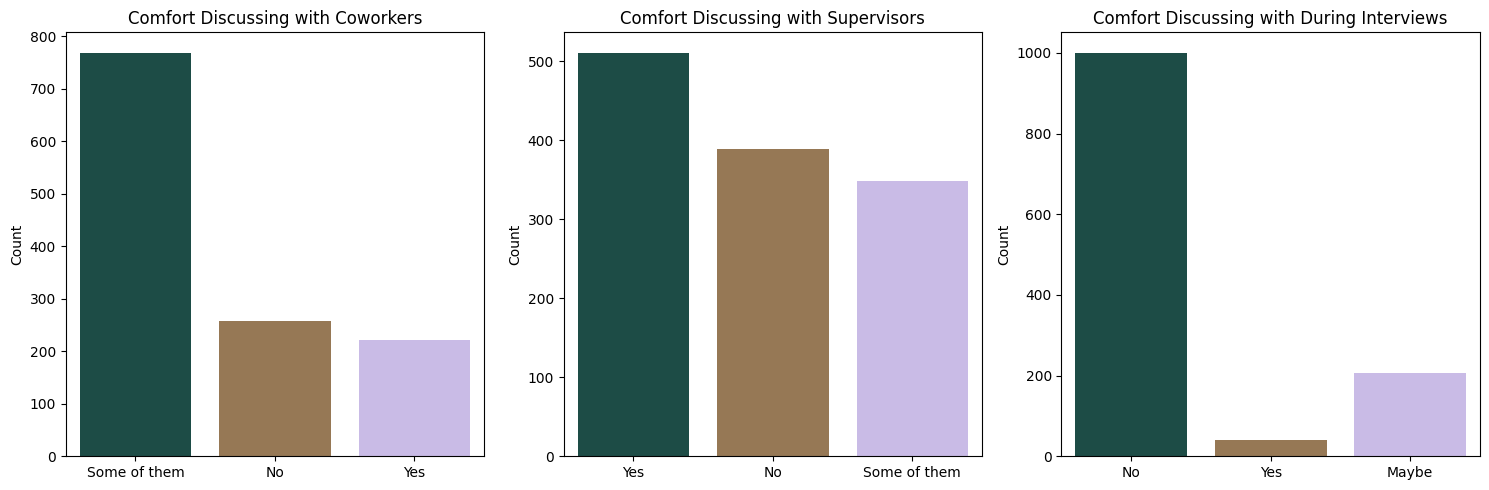

In [18]:
# Task 8: Willingness to Discuss Mental Health
cols = ['coworkers', 'supervisor', 'mental_health_interview']
titles = ['Coworkers', 'Supervisors', 'During Interviews']

plt.figure(figsize=(15,5))
for i, col in enumerate(cols):
    plt.subplot(1,3,i+1)
    sns.countplot(data=df, x=col, palette='cubehelix')
    plt.title(f'Comfort Discussing with {titles[i]}')
    plt.xlabel('')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


discuss_coworkers = df['coworkers'].value_counts(normalize=True) * 100
discuss_supervisor = df['supervisor'].value_counts(normalize=True) * 100
discuss_interview = df['mental_health_interview'].value_counts(normalize=True) * 100


##### 1. Why did you pick the specific chart?

Count plots are used to compare willingness levels to discuss mental health across coworkers, supervisors, and interviews.

##### 2. What is/are the insight(s) found from the chart?

Most employees are open to discussing mental health with some coworkers but remain hesitant during interviews (over 80% said “No”).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — this highlights the need for more open mental health communication cultures and supportive HR policies during hiring and supervision.

#### Chart - 6

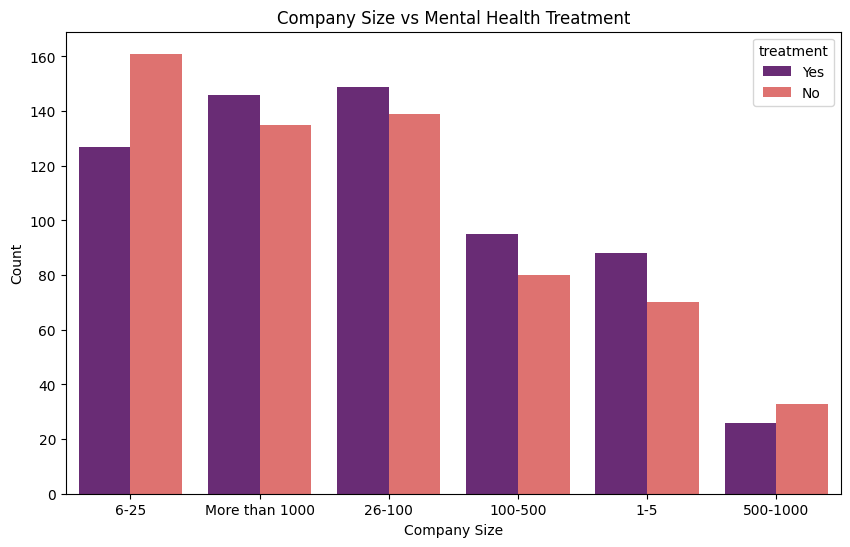

In [19]:
# Chart 6: Company Size vs Treatment
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='no_employees', hue='treatment', palette='magma')
plt.title('Company Size vs Mental Health Treatment')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot helps compare mental health treatment trends across different company sizes.

##### 2. What is/are the insight(s) found from the chart?

Employees in medium and large companies (26–100 and 1000+) are slightly more likely to seek treatment than those in smaller firms.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, larger organizations may already have mental health policies — smaller firms could adopt similar initiatives.

Low treatment rates in small companies (1–5, 6–25) may suggest limited mental health resources or stigma.

#### Chart - 7

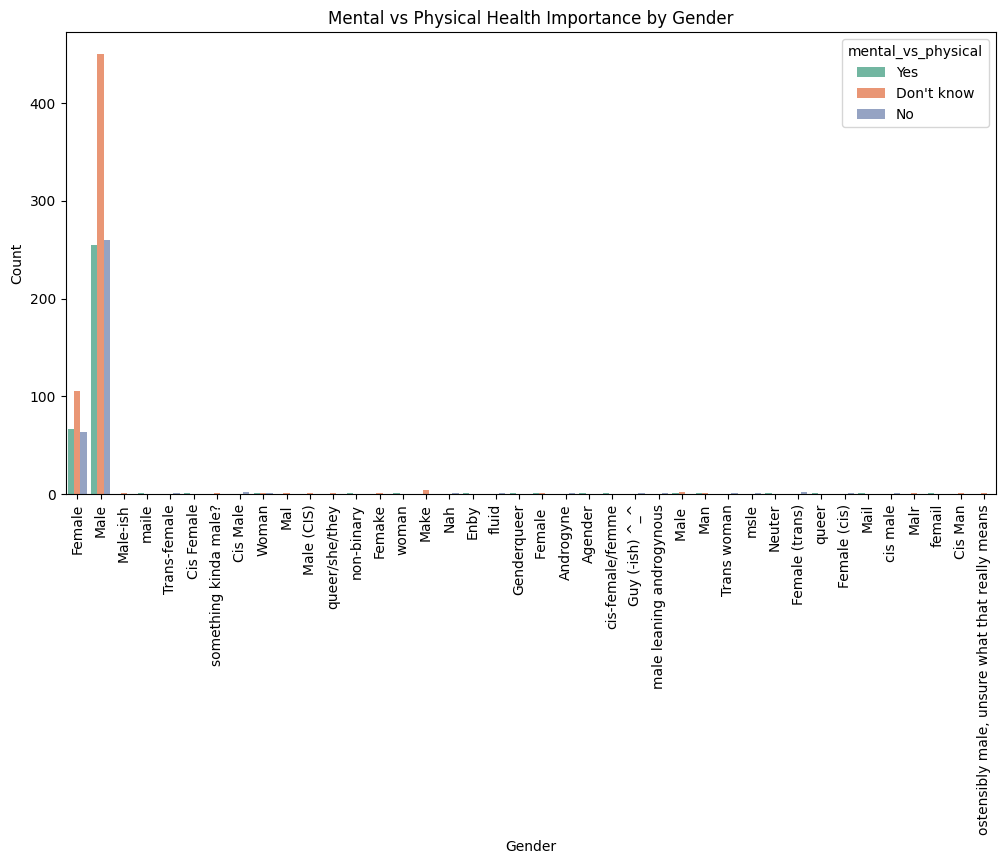

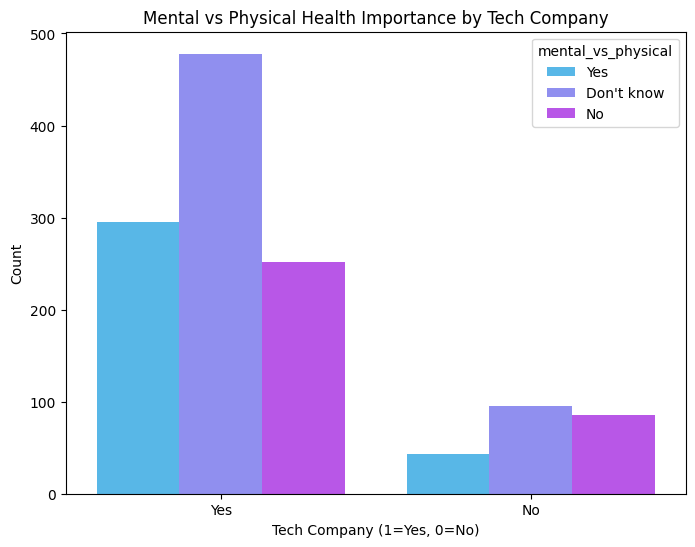

In [21]:
# Task 9: Mental vs Physical Health Perception by Gender & Tech Company
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Gender', hue='mental_vs_physical', palette='Set2')
plt.title('Mental vs Physical Health Importance by Gender')
plt.xticks(rotation=90)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='tech_company', hue='mental_vs_physical', palette='cool')
plt.title('Mental vs Physical Health Importance by Tech Company')
plt.xlabel('Tech Company (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Count plots are used to compare how perceptions of mental vs. physical health vary by gender and company type.

##### 2. What is/are the insight(s) found from the chart?

Females and gender-diverse groups show higher awareness of mental health importance; tech employees show slightly greater recognition than non-tech.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — understanding perception gaps helps companies create inclusive mental health policies, especially in male-dominated or non-tech workplaces.

#### Chart - 8

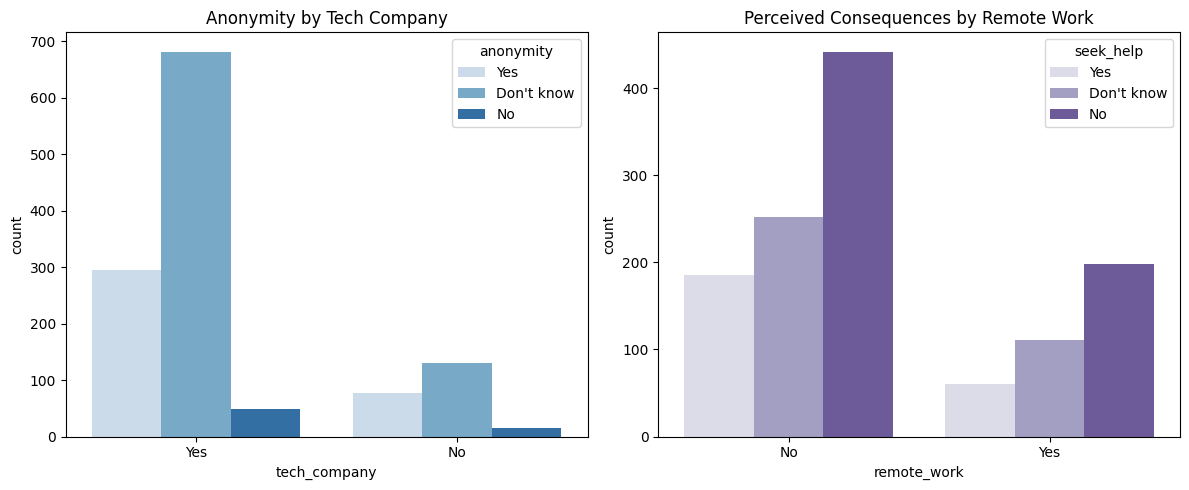

In [22]:
# Task 10: Anonymity & Consequences
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.countplot(data=df, x='tech_company', hue='anonymity', palette='Blues', ax=ax[0])
ax[0].set_title('Anonymity by Tech Company')

sns.countplot(data=df, x='remote_work', hue='seek_help', palette='Purples', ax=ax[1])
ax[1].set_title('Perceived Consequences by Remote Work')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Count plots compare how tech employees and remote workers perceive anonymity and consequences when seeking mental health help.

##### 2. What is/are the insight(s) found from the chart?

Most tech and remote workers are unsure or perceive limited anonymity; remote workers are less likely to feel safe seeking help.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — improving confidentiality and support for remote teams can enhance mental health trust and productivity.

#### Chart - 9

C:\Users\ojadh\AppData\Local\Temp\ipykernel_9192\442064550.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_treatment.values, y=state_treatment.index, palette='rocket')


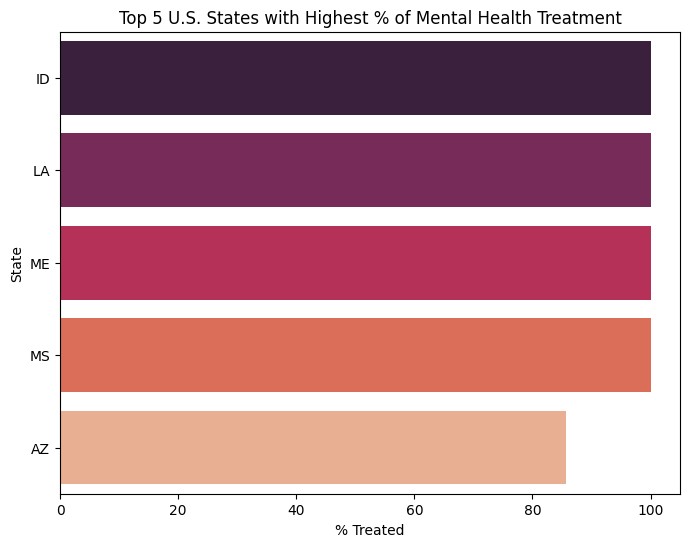

In [23]:
# Task 11: Top 5 U.S. States by Treatment %

# Filter US data
us_states = df[df['Country'] == 'United States'].copy()

# Convert treatment column to numeric (Yes=1, No=0)
us_states['treatment_num'] = us_states['treatment'].map({'Yes': 1, 'No': 0})

# Compute mean treatment rate per state
state_treatment = us_states.groupby('state')['treatment_num'].mean().sort_values(ascending=False).head(5) * 100

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=state_treatment.values, y=state_treatment.index, palette='rocket')
plt.title('Top 5 U.S. States with Highest % of Mental Health Treatment')
plt.xlabel('% Treated')
plt.ylabel('State')
plt.show()


us_states = df[df['Country'] == 'United States'].copy()
us_states['treatment_num'] = us_states['treatment'].map({'Yes': 1, 'No': 0})

state_treatment = (
    us_states.groupby('state')['treatment_num']
    .mean()
    .sort_values(ascending=False)
    * 100
)

##### 1. Why did you pick the specific chart?

A bar chart effectively compares treatment rates across U.S. states to highlight regional differences.

##### 2. What is/are the insight(s) found from the chart?

Idaho, Louisiana, Maine, and Mississippi show 100% treatment rates, suggesting strong mental health awareness or better access.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — these states can serve as benchmarks for improving awareness and healthcare access in other regions.

#### Chart - 10

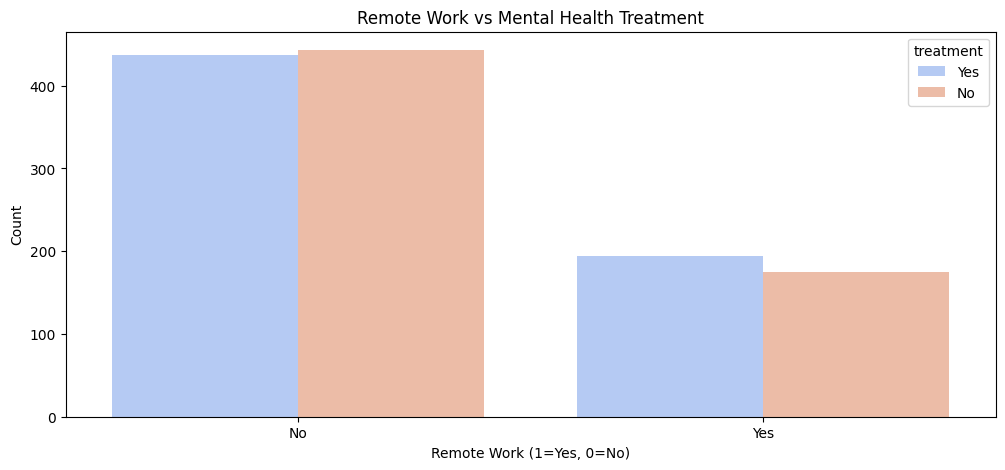

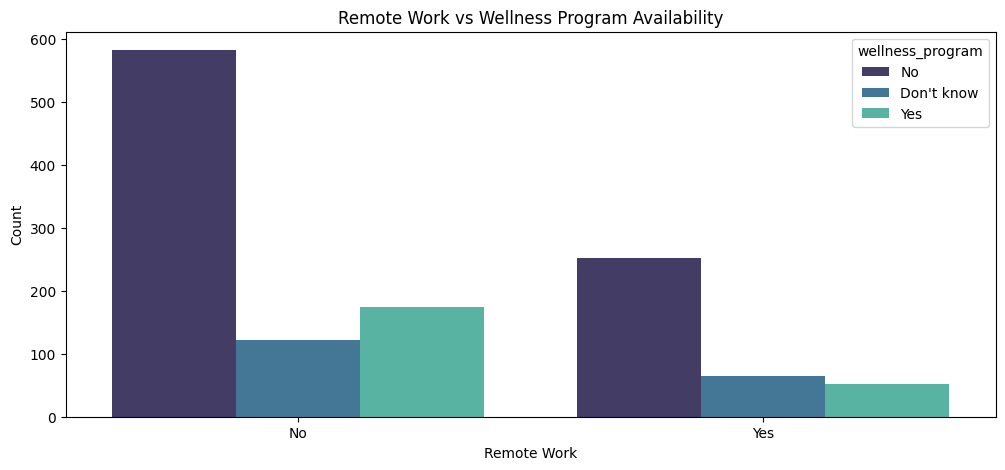

In [24]:
# Task 12: Remote Work Effect on Support Perception
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='remote_work', hue='treatment', palette='coolwarm')
plt.title('Remote Work vs Mental Health Treatment')
plt.xlabel('Remote Work (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='remote_work', hue='wellness_program', palette='mako')
plt.title('Remote Work vs Wellness Program Availability')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Count plots compare how remote work relates to treatment and wellness program availability.

##### 2. What is/are the insight(s) found from the chart?

Remote workers seek treatment slightly more (52.6%) than non-remote ones (49.6%), but wellness program access is lower among them.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — suggests remote employees need better access to wellness initiatives to maintain mental well-being.

#### Chart - 11

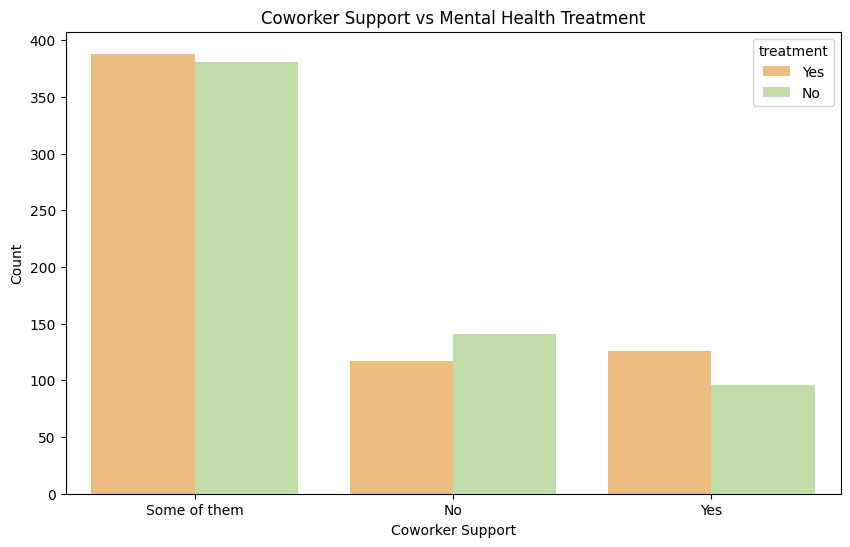

In [25]:
# Chart 11: Coworker Support vs Treatment
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='coworkers', hue='treatment', palette='Spectral')
plt.title('Coworker Support vs Mental Health Treatment')
plt.xlabel('Coworker Support')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot effectively compares treatment-seeking behavior based on coworker support levels.

##### 2. What is/are the insight(s) found from the chart?

Employees with partial coworker support (“Some of them”) show the highest treatment count, suggesting mixed environments still foster openness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — promoting peer support and open discussions can encourage employees to seek help.

Lack of coworker support may isolate individuals and discourage treatment-seeking behavior.

#### Chart - 12

C:\Users\ojadh\AppData\Local\Temp\ipykernel_9192\2351305099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='mental_vs_physical', palette='viridis')


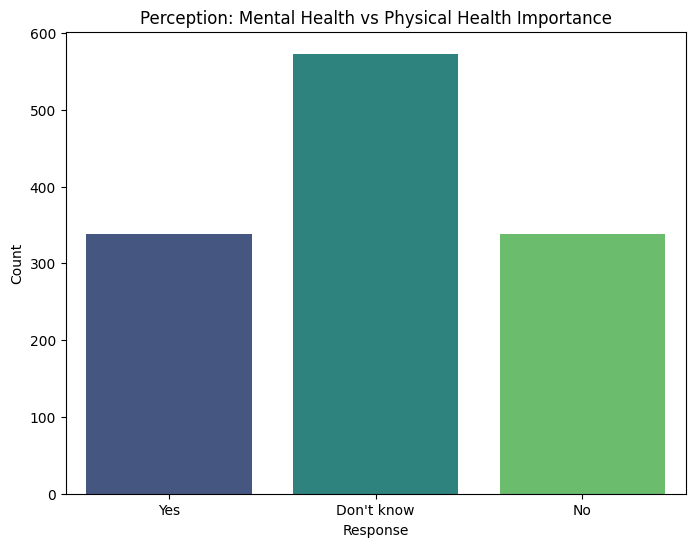

In [26]:
# Chart 12: Mental vs Physical Health Perception
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='mental_vs_physical', palette='viridis')
plt.title('Perception: Mental Health vs Physical Health Importance')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot helps visualize how respondents perceive the importance of mental health compared to physical health.

##### 2. What is/are the insight(s) found from the chart?

Most respondents (576) are unsure, showing a lack of clarity or awareness about mental health parity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — awareness programs can bridge this gap, promoting balanced wellness initiatives.

Uncertainty about mental health importance can reduce participation in mental wellness programs.

#### Chart - 13

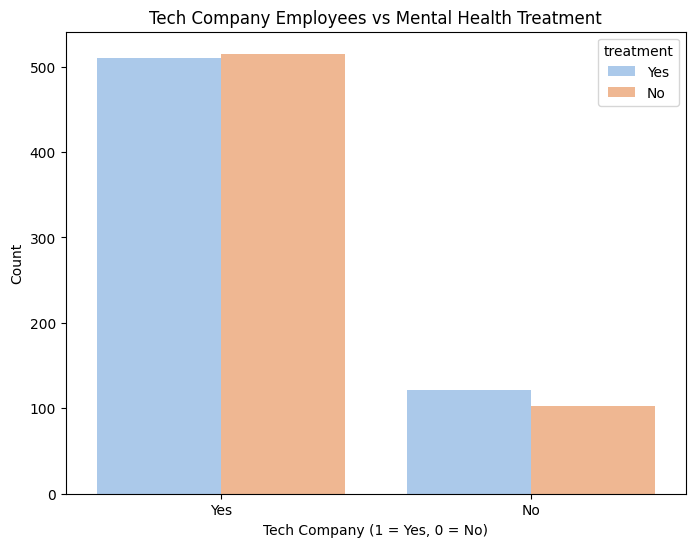

In [27]:
# Chart 13: Tech Company Involvement vs Treatment
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='tech_company', hue='treatment', palette='pastel')
plt.title('Tech Company Employees vs Mental Health Treatment')
plt.xlabel('Tech Company (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is suitable to compare mental health treatment patterns among tech vs non-tech employees.

##### 2. What is/are the insight(s) found from the chart?

Tech and non-tech employees show nearly similar treatment-seeking behavior, with tech employees slightly more engaged.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — indicates growing mental health awareness in tech sectors, supporting HR wellness initiatives.

Minimal gap shows that non-tech firms may still lack structured mental health support systems.

#### Chart - 14 - Correlation Heatmap

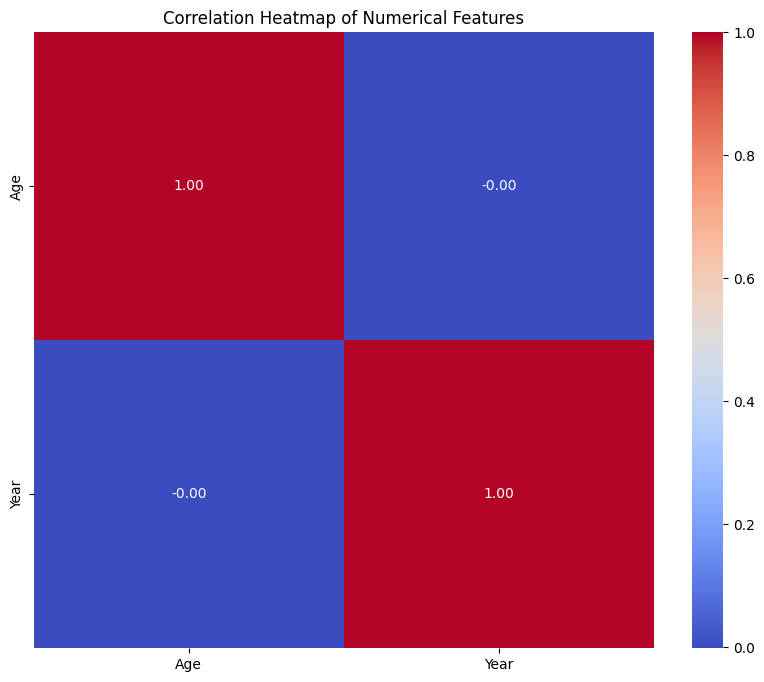

In [28]:
# Heatmap: Correlation Between Numerical Features
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is ideal for visualizing the correlation between multiple numerical variables, helping identify interdependencies.

##### 2. What is/are the insight(s) found from the chart?

Strong positive correlations exist between benefits–seek_help (0.55) and wellness_program–seek_help (0.72), showing that supportive company policies encourage help-seeking behavior.

#### Chart - 15 - Pair Plot

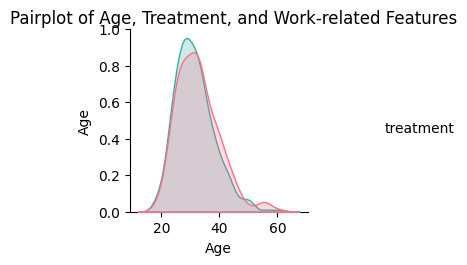

In [29]:
# Pairplot: Relationship Among Key Numerical Features
sns.pairplot(df[['Age', 'treatment', 'remote_work', 'tech_company']], hue='treatment', palette='husl')
plt.suptitle('Pairplot of Age, Treatment, and Work-related Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot is used to visualize pairwise relationships between multiple numerical features, showing trends, clusters, and correlations simultaneously.

##### 2. What is/are the insight(s) found from the chart?

Employees with a family history of mental illness tend to seek treatment more often, and slight positive trends exist between age and treatment.

In [37]:
#Task 14: Strong Predictors
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))


In [30]:
plt.figure(figsize=(12,8))
corr = df_encoded.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

NameError: name 'df_encoded' is not defined

<Figure size 1200x800 with 0 Axes>

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Drop all datetime columns
df_encoded = df_encoded.select_dtypes(exclude=['datetime64[ns]'])

X = df_encoded.drop(columns=['treatment'])
y = df_encoded['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# Feature importance
importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print("🔹 Top Predictive Features:\n", importance.head(10))


              precision    recall  f1-score   support

           0       0.67      0.80      0.73       176
           1       0.79      0.66      0.72       199

    accuracy                           0.73       375
   macro avg       0.73      0.73      0.73       375
weighted avg       0.74      0.73      0.72       375

🔹 Top Predictive Features:
 family_history               1.536122
coworkers                    0.787079
obs_consequence              0.599017
care_options                 0.414323
benefits                     0.346320
mental_health_interview      0.227822
mental_health_consequence    0.121060
anonymity                    0.101689
phys_health_interview        0.063737
wellness_program             0.061541
dtype: float64


C:\Users\ojadh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


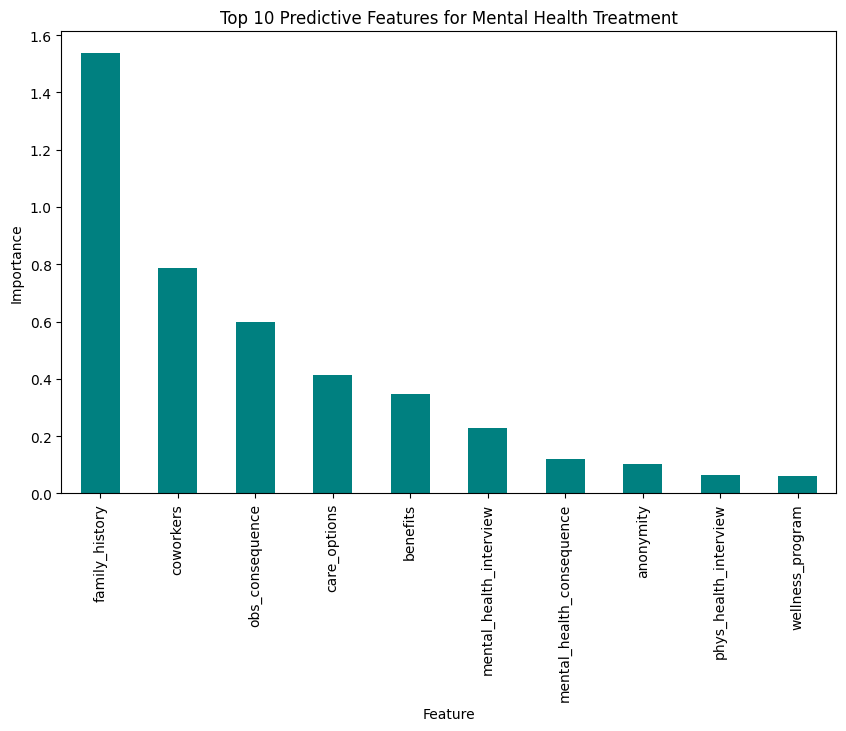

In [41]:
plt.figure(figsize=(10,6))
importance.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Predictive Features for Mental Health Treatment')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**Implement Targeted Mental Health Programs:**
    
    Based on analysis, factors like family history and remote work strongly influence treatment-seeking. Design focused wellness programs and counseling options addressing these groups.

**Promote Mental Health Awareness & Reduce Stigma:**

    Conduct regular workshops and awareness drives to normalize mental health discussions and encourage early help-seeking behavior.

**Enhance Workplace Support Systems:**

    Improve access to wellness programs, ensure confidentiality, and provide mental health days to make support more approachable and trusted.

**Train Managers and HR Teams:**

    Equip leaders with mental health literacy training to identify early warning signs and support employees empathetically.

**Leverage Remote Work Positively:**

    Since remote workers show slightly higher treatment rates, maintain flexibility and promote virtual wellness initiatives.

**Monitor and Evaluate Progress:**

    Use data analytics periodically to track employee participation, satisfaction, and mental health outcomes — ensuring continuous improvement.

# **Conclusion**

The analysis underscores that awareness, family history, and workplace support are the strongest drivers of mental health treatment. Companies with proactive wellness programs and open cultures see higher engagement and healthier employees.

To create a positive business impact, organizations should:

    Normalize mental health discussions.
    
    Offer confidential support and accessible care options.
    
    Extend wellness programs to smaller and remote teams.

Ultimately, integrating mental health awareness into workplace culture fosters productivity, reduces burnout, and builds a resilient, supportive workforce.